In [1]:
# import the libraries
import tensorflow as tf
from keras._tf_keras.keras import layers
import keras

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# define the file path
file_path = "datasets/fuel_optimal_db.csv"

# Load the data using pandas
data = pd.read_csv(file_path)

# drop unused columns
columns_to_drop = ["mima [kg]", "mima2 [kg]", "mima3 [kg]", "mfms_approx"]
data = data.drop(columns=columns_to_drop)

# Preprocess data
y = data["mt [kg]"] / data["ms [kg]"] # put the data in 0-1 range
X = data.drop("mt [kg]", axis=1)

# split data in train and test -- 20% of the dataset is used for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
# Multi Layer Perceptron

# initialize the model
model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(X_train.shape[1],)),
        layers.BatchNormalization(),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation="sigmoid"),
    ]
)

# compile the model
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

c:\Users\AndreaBellome\Documents\GitHub\mlp-space-traj\.venv\lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [4]:
# train the model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=10,
    verbose=1,
    batch_size=32,
)

Epoch 1/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step - loss: 0.0031 - mean_absolute_error: 0.0365
Epoch 2/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - loss: 0.0011 - mean_absolute_error: 0.0253
Epoch 3/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - loss: 0.0011 - mean_absolute_error: 0.0249
Epoch 4/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 47s 1ms/step - loss: 0.0010 - mean_absolute_error: 0.0247
Epoch 5/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step - loss: 0.0010 - mean_absolute_error: 0.0246
Epoch 6/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - loss: 0.0010 - mean_absolute_error: 0.0245
Epoch 7/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - loss: 0.0010 - mean_absolute_error: 0.0245
Epoch 8/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - loss: 0.0010 - mean_absolute_error: 0.0245
Epoch 9/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.0010 - mean_absolute_error: 0.0245
Epoch 10/10
33188/33188 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.0010 - mean_ab

In [5]:
# evaluate and check the history
test_loss = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_test_scaled)
train_mae = history.history["mean_absolute_error"]

8297/8297 ━━━━━━━━━━━━━━━━━━━━ 7s 851us/step - loss: 8.4881e-04 - mean_absolute_error: 0.0221
8297/8297 ━━━━━━━━━━━━━━━━━━━━ 8s 923us/step


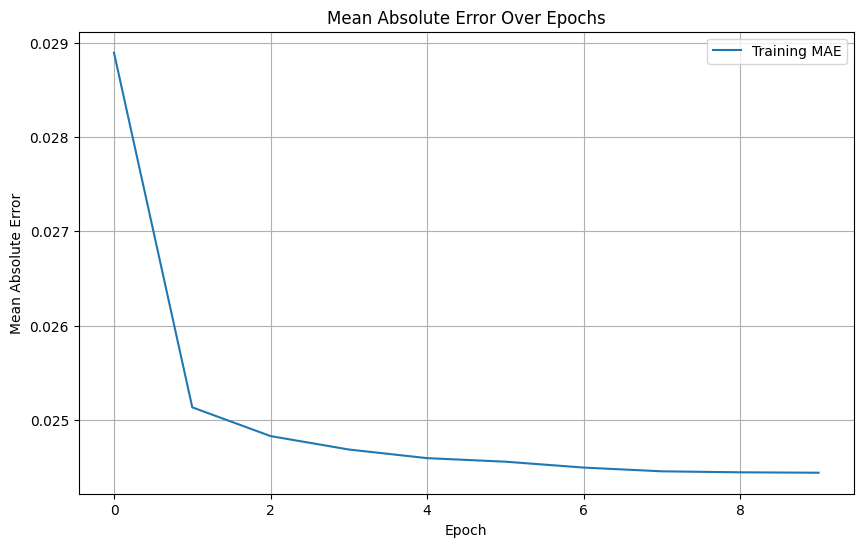

In [6]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(train_mae, label='Training MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()